# Лабораторная работа №2

## Тема работы: «Решение задачи регрессии»

## Цели работы

- исследование процесса решения задачи регрессии
- изучение библиотек *Python*: *scikit-learn* и *Pandas*

## Пояснения к работе

## Ход работы

В своей рабочей папке открыть командное окно и запустить jupyter командой
```bash
> jupyter notebook
```
Создать новый блокнот: **[New] -> [Python 3]**.

В новом блокноте загрузить пару необходимых библиотек:

In [1]:
import numpy as np
import pandas as pd

#### Подготовка данных
Загрузим данные из файла *csv* функцией *read_csv* библиотеки *Pandas*. 
Из всей базы рейтингов университетов нас интересует только 2015 год. 
Выберем только строки, соответствующие этому году.
Метод *head* получившегося фрейма (объекта класса DataFrame) выводит первые 5 строк таблицы.

In [2]:
shanghai_rank = pd.read_csv('datasets/shanghaiData.csv')
shanghai_rank = shanghai_rank[shanghai_rank['year'] == 2015]
shanghai_rank.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
4397,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,76.6,2015
4398,2,Stanford University,2,73.3,40.7,89.6,80.1,70.1,70.6,53.8,2015
4399,3,Massachusetts Institute of Technology (MIT),3,70.4,68.2,80.7,60.6,73.1,61.1,68.0,2015
4400,4,"University of California, Berkeley",4,69.6,65.1,79.4,66.1,65.6,67.9,56.5,2015
4401,5,University of Cambridge,1,68.8,77.1,96.6,50.8,55.6,66.4,55.8,2015


Заполним отсутствующие значения числом 0.

In [151]:
shanghai_rank.fillna(0.0, inplace=True)

Целью задачи регрессии в данном случае &mdash; предсказать значение колонки *total_score* на основании других **числовых** колонок, за исключением *world_rank* и *year*.

Разобьем всё множество данных на тестовое и обучающее. Отведём на тестовое множество 25% всех данных.

In [155]:
SEED = 42
from sklearn.model_selection import train_test_split
train, test = train_test_split(shanghai_rank, test_size=0.25, random_state=SEED)

Выберем колонки, которые будут использованы для решения задачи регрессии и создадим массивы, которые будут использованы для обучения.

In [156]:
cols = ['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

train_data = np.array(train[cols])
test_data  = np.array(test[cols])

train_target = np.array(train['total_score'])
test_target = np.array(test['total_score'])

Построим зависимость *total_score* от каждого из выбранных столбцов.

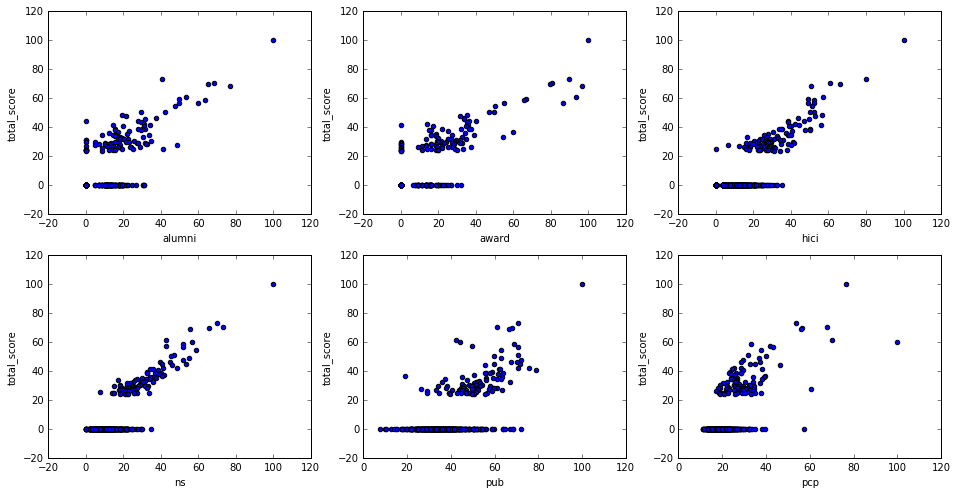

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    plt.scatter(shanghai_rank[col], shanghai_rank['total_score'])
    plt.xlabel(col)
    plt.ylabel('total_score')

В качестве примера для решения задачи регрессии выберем просетйший метод &mdash; метод линейной регрессии

In [269]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Обучим модель на множестве обучающих данных.

In [270]:
lr.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Проверим качество регрессии на тестовом множестве.

In [271]:
prediction = lr.predict(test_data)

Среднеквадратическое отклонение предсказанного значения от реального:

In [272]:
from sklearn.metrics import mean_squared_error
dist = mean_squared_error(test_target, prediction)
print(dist)

38.5742019015


Графически можно сравнить предсказания и реальные значения так:

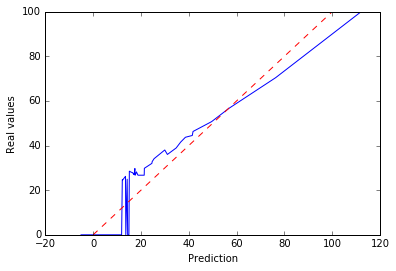

In [273]:
x, y = zip(*sorted(zip(prediction, test_target)))

plt.plot(x, y)
plt.hold(True)
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel('Prediction')
plt.ylabel('Real values')

В идеале все значения лежали бы на прямой $y=x$.

Ваша задача &mdash; незначительно улучшить результат. Баллы за лабораторную работу будут вычисляться как 

$$M = \left\lceil{\min\left(10 \left(38.5743 - \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2\right), 10 \right)}\right\rceil$$

In [279]:
print("Количество баллов = {}".format(np.min([100 * (38.5743 - dist), 10])))

Количество баллов = 0.009809849740349819


Для этого можно использовать **любые** методы из библиотеки *sklearn*. Переменную *SEED* менять нельзя.

## Содержание отчета

Отчет должен представлять собой готовый Jupyter Notebook с комментариями и пояснениями.